IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def null_perc(s,d):
  return s/d


IMPORTING THE DATASET

In [ ]:
diab_df = pd.read_csv('/content/diabetic_data.csv')
diab_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


# Data Set Description


* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission










###DATA EXPLORATION

In [ ]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
diab_df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [ ]:
diab_df['readmitted']=diab_df['readmitted'].replace({"NO":0,">30":0,"<30":1})

In [ ]:
df_obj = diab_df.columns[diab_df.dtypes==object]
df_num = diab_df.columns[diab_df.dtypes!=object]

In [ ]:
diab_df.shape

(101766, 50)

Checking for missing values

In [ ]:
diab_df.loc[diab_df['weight'] == '?']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0


Since, the '?' values are sizeable and occupy more percent of data, instead of removing them, we remove the entire attribute. 

In [ ]:
diab_df = diab_df.replace("?",np.nan)

In [ ]:
diab_df.replace("?",np.nan)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0


Now, we can see that the missing values are removed from the Dataset diab_df

(array([90409.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

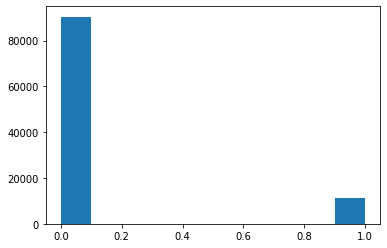

In [ ]:
plt.hist(diab_df['readmitted'])

Here, we see that there are 3 class variables.

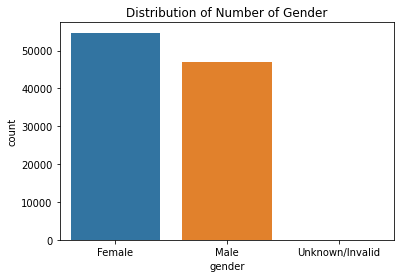

Proportions of Race Value
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


In [ ]:
sns.countplot(x = "gender", data = diab_df)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(diab_df.gender.value_counts())

Here, we see that there are only 3 values of gender which have unknown values. We remove them.

In [ ]:
diab_df = diab_df.drop(diab_df.loc[diab_df["gender"]=="Unknown/Invalid"].index, axis=0)

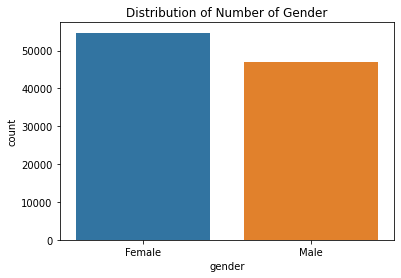

Proportions of Race Value
Female    54708
Male      47055
Name: gender, dtype: int64


In [ ]:
sns.countplot(x = "gender", data = diab_df)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(diab_df.gender.value_counts())

In [ ]:
for i in list(diab_df.columns):
  print(i,null_perc(diab_df[i].isnull().sum(),len(diab_df)))

encounter_id 0.0
patient_nbr 0.0
race 0.02231655906370685
gender 0.0
age 0.0
weight 0.9685838664347552
admission_type_id 0.0
discharge_disposition_id 0.0
admission_source_id 0.0
time_in_hospital 0.0
payer_code 0.3955759952045439
medical_specialty 0.49081689808673096
num_lab_procedures 0.0
num_procedures 0.0
num_medications 0.0
number_outpatient 0.0
number_emergency 0.0
number_inpatient 0.0
diag_1 0.00020636184074761946
diag_2 0.0035179780470308464
diag_3 0.013983471399231548
number_diagnoses 0.0
max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0


In [ ]:
clean_diab_df=diab_df.drop(columns=['weight','payer_code','medical_specialty'])

In [ ]:
clean_diab_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


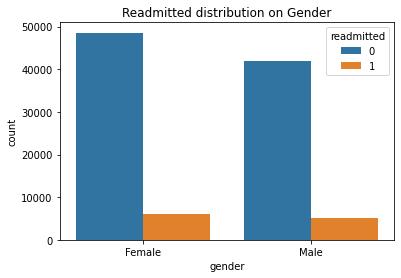

In [ ]:
sns.countplot(x="gender", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on Gender")
plt.show()

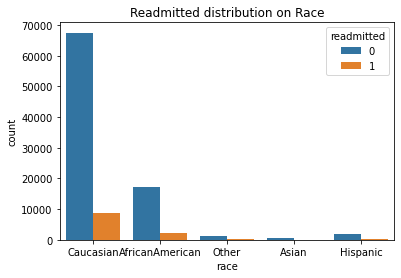

In [ ]:
sns.countplot(x="race", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on Race")
plt.show()

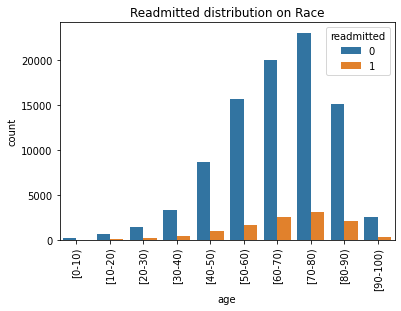

In [ ]:
sns.countplot(x="age", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on Race")
plt.xticks(rotation=90)
plt.show()

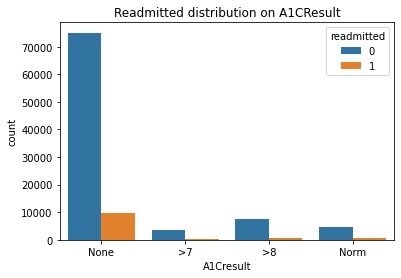

In [ ]:
sns.countplot(x="A1Cresult", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on A1CResult")
#plt.xticks(rotation=90)
plt.show()

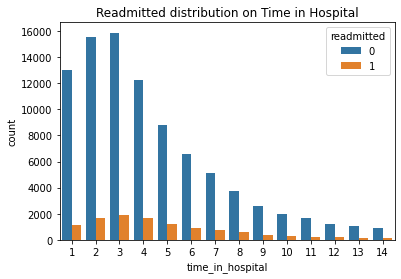

In [ ]:
sns.countplot(x="time_in_hospital", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on Time in Hospital")
#plt.xticks(rotation=90)
plt.show()

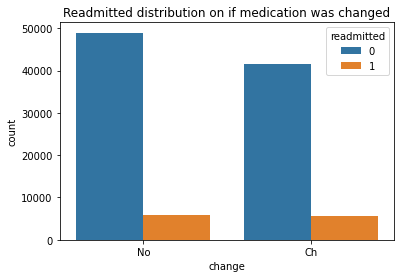

In [ ]:
sns.countplot(x="change", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on if medication was changed")
#plt.xticks(rotation=90)
plt.show()

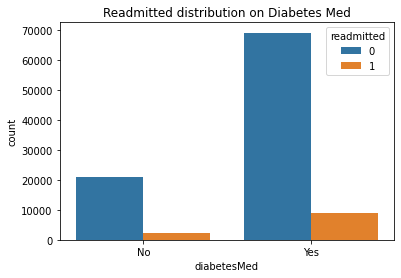

In [ ]:
sns.countplot(x="diabetesMed", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on Diabetes Med")
#plt.xticks(rotation=90)
plt.show()

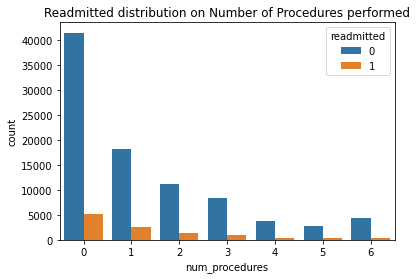

In [ ]:
sns.countplot(x="num_procedures", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on Number of Procedures performed")
#plt.xticks(rotation=90)
plt.show()

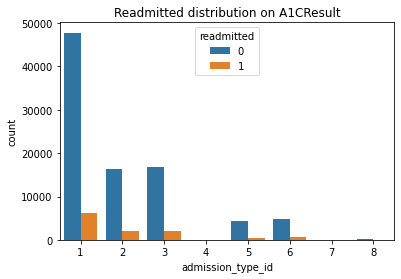

In [ ]:
sns.countplot(x="admission_type_id", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on A1CResult")
#plt.xticks(rotation=90)
plt.show()

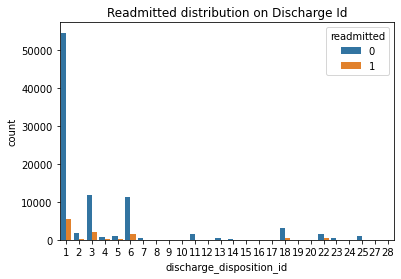

In [ ]:
sns.countplot(x="discharge_disposition_id", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on Discharge Id")
#plt.xticks(rotation=90)
plt.show()

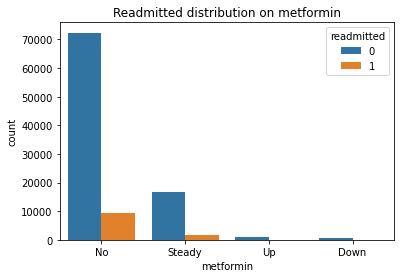

In [ ]:
sns.countplot(x="metformin", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on metformin")
#plt.xticks(rotation=90)
plt.show()

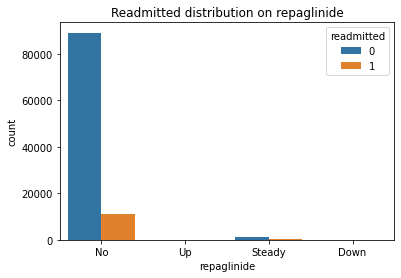

In [ ]:
sns.countplot(x="repaglinide", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on repaglinide")
#plt.xticks(rotation=90)
plt.show()

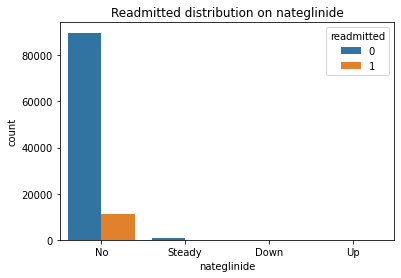

In [ ]:
sns.countplot(x="nateglinide", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on nateglinide")
#plt.xticks(rotation=90)
plt.show()

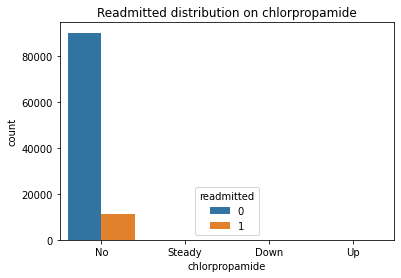

In [ ]:
sns.countplot(x="chlorpropamide", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on chlorpropamide")
#plt.xticks(rotation=90)
plt.show()

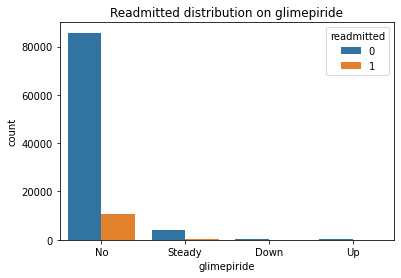

In [ ]:
sns.countplot(x="glimepiride", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on glimepiride")
#plt.xticks(rotation=90)
plt.show()

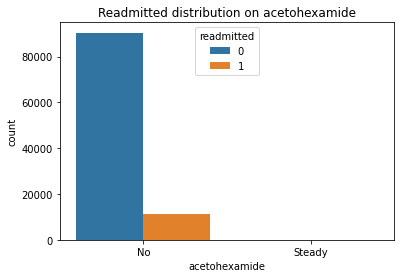

In [ ]:
sns.countplot(x="acetohexamide", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on acetohexamide")
#plt.xticks(rotation=90)
plt.show()

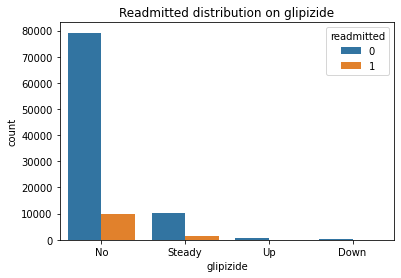

In [ ]:
sns.countplot(x="glipizide", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on glipizide")
#plt.xticks(rotation=90)
plt.show()

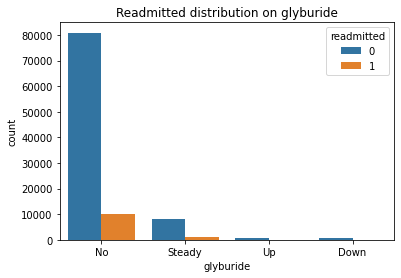

In [ ]:
sns.countplot(x="glyburide", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on glyburide")
#plt.xticks(rotation=90)
plt.show()

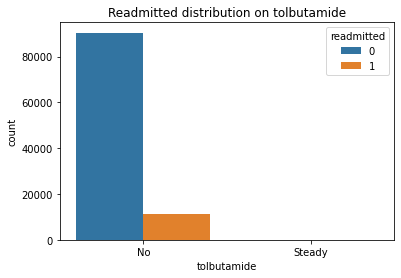

In [ ]:
sns.countplot(x="tolbutamide", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on tolbutamide")
#plt.xticks(rotation=90)
plt.show()

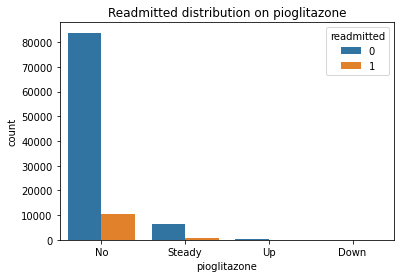

In [ ]:
sns.countplot(x="pioglitazone", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on pioglitazone")
#plt.xticks(rotation=90)
plt.show()

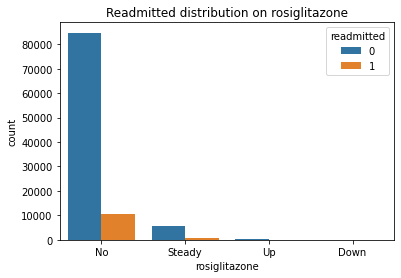

In [ ]:
sns.countplot(x="rosiglitazone", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on rosiglitazone")
#plt.xticks(rotation=90)
plt.show()

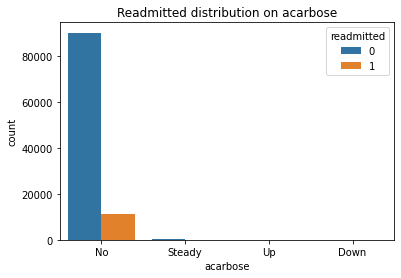

In [ ]:
sns.countplot(x="acarbose", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on acarbose")
#plt.xticks(rotation=90)
plt.show()

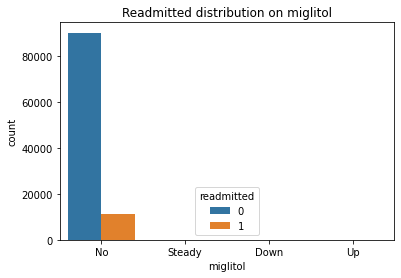

In [ ]:
sns.countplot(x="miglitol", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on miglitol")
#plt.xticks(rotation=90)
plt.show()

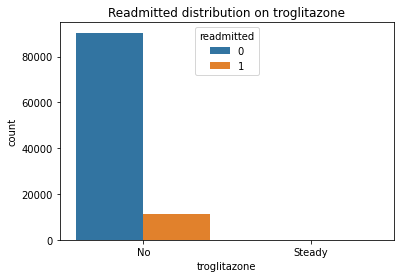

In [ ]:
sns.countplot(x="troglitazone", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on troglitazone")
#plt.xticks(rotation=90)
plt.show()

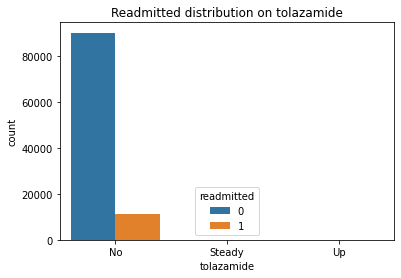

In [ ]:
sns.countplot(x="tolazamide", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on tolazamide")
#plt.xticks(rotation=90)
plt.show()

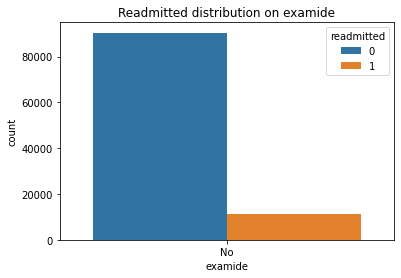

In [ ]:
sns.countplot(x="examide", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on examide")
#plt.xticks(rotation=90)
plt.show()

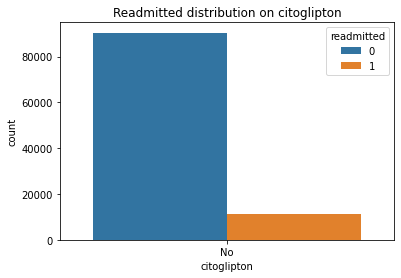

In [ ]:
sns.countplot(x="citoglipton", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on citoglipton")
#plt.xticks(rotation=90)
plt.show()

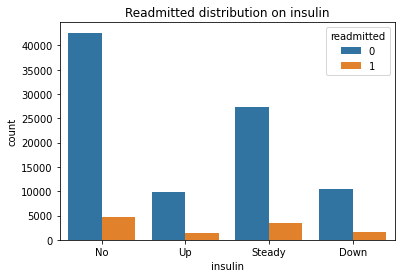

In [ ]:
sns.countplot(x="insulin", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on insulin")
#plt.xticks(rotation=90)
plt.show()

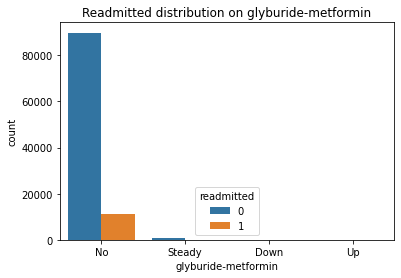

In [ ]:
sns.countplot(x="glyburide-metformin", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on glyburide-metformin")
#plt.xticks(rotation=90)
plt.show()

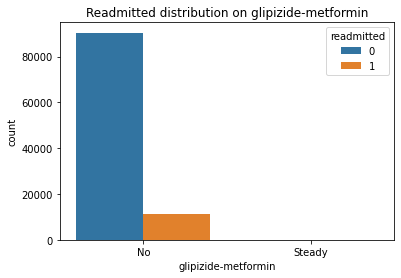

In [ ]:
sns.countplot(x="glipizide-metformin", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on glipizide-metformin")
#plt.xticks(rotation=90)
plt.show()

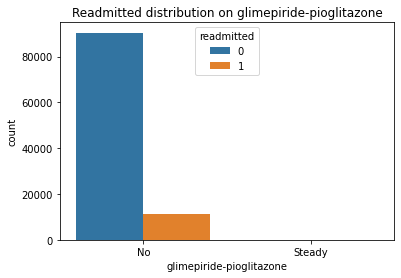

In [ ]:
sns.countplot(x="glimepiride-pioglitazone", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on glimepiride-pioglitazone")
#plt.xticks(rotation=90)
plt.show()

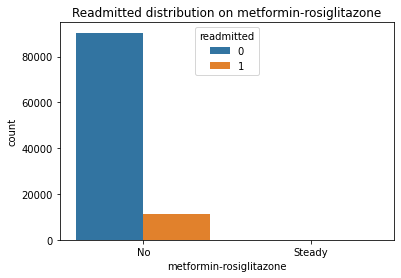

In [ ]:
sns.countplot(x="metformin-rosiglitazone", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on metformin-rosiglitazone")
#plt.xticks(rotation=90)
plt.show()

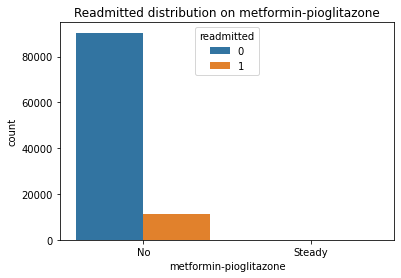

In [ ]:
sns.countplot(x="metformin-pioglitazone", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on metformin-pioglitazone")
#plt.xticks(rotation=90)
plt.show()

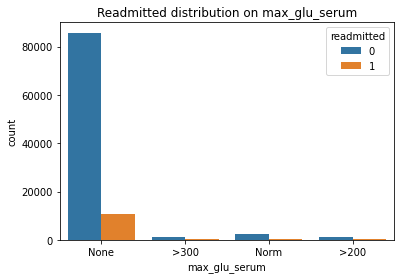

In [ ]:
sns.countplot(x="max_glu_serum", hue="readmitted", data=clean_diab_df)
plt.title("Readmitted distribution on max_glu_serum")
#plt.xticks(rotation=90)
plt.show()

In [ ]:
clean_diab_df.isnull().sum()

encounter_id                   0
patient_nbr                    0
race                        2271
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [ ]:
clean_diab_df['race']=clean_diab_df['race'].fillna(clean_diab_df['race'].mode()[0])

In [ ]:
clean_diab_df['diag_1']=clean_diab_df['diag_1'].fillna(clean_diab_df['diag_1'].mode()[0])

In [ ]:
clean_diab_df['diag_2']=clean_diab_df['diag_2'].fillna(clean_diab_df['diag_2'].mode()[0])

In [ ]:
clean_diab_df['diag_3']=clean_diab_df['diag_3'].fillna(clean_diab_df['diag_3'].mode()[0])

In [ ]:
clean_diab_df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
object_data=clean_diab_df.select_dtypes('O')

In [ ]:
object_data

,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),250.83,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),250.13,291,458,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),560,276,787,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),38,590,296,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),996,285,998,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes


In [ ]:
clean_diab_df['age']=clean_diab_df['age'].replace({"[0-10)":5,"[10-20)":15,"[20-30)":25,"[30-40)":35,"[40-50)":45,"[50-60)":55,"[60-70)":65,"[70-80)":75,"[80-90)":85})

In [ ]:
object_data1=clean_diab_df.select_dtypes('O')

In [ ]:
object_data1

,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,5,250.83,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,15,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,25,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,35,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,45,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75,250.13,291,458,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,85,560,276,787,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,75,38,590,296,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,85,996,285,998,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes


In [ ]:
numer_data=clean_diab_df.select_dtypes(np.number)

In [ ]:
numer_data

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9,0
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6,0
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7,0
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,0,0,9,0
101762,443847782,74694222,1,4,5,5,33,3,18,0,0,1,9,0
101763,443854148,41088789,1,1,7,1,53,0,9,1,0,0,13,0
101764,443857166,31693671,2,3,7,10,45,2,21,0,0,1,9,0


In [ ]:
label_encoder=LabelEncoder()
for i in object_data1:
  object_data1[i]=label_encoder.fit_transform(object_data1[i].astype('str'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data=pd.concat([numer_data,object_data1],axis=1)

In [ ]:
data.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1,0,2,0,4,124,133,86,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9,0,2,0,0,143,79,121,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6,0,0,0,1,454,78,766,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7,0,2,1,2,554,97,248,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5,0,2,1,3,54,24,86,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1


In [ ]:
data1=data.drop(columns=['encounter_id','patient_nbr'],axis=1)

In [ ]:
data1.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,6,25,1,1,41,0,1,0,0,0,1,0,2,0,4,124,133,86,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,7,3,59,0,18,0,0,0,9,0,2,0,0,143,79,121,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1
2,1,1,7,2,11,5,13,2,0,1,6,0,0,0,1,454,78,766,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1
3,1,1,7,2,44,1,16,0,0,0,7,0,2,1,2,554,97,248,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1
4,1,1,7,1,51,0,8,0,0,0,5,0,2,1,3,54,24,86,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1


In [ ]:
data1.isna().sum()

admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
readmitted                  0
race                        0
gender                      0
age                         0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazo

In [ ]:
Y=data1['readmitted']
X=data1.drop(columns=['readmitted'], axis=1)

In [ ]:
X.shape, Y.shape

((101763, 44), (101763,))

###CLASSIFICATION METHODS before SAMPLING

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
from sklearn import metrics
dtree=DecisionTreeClassifier(max_depth=30)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=30)

In [ ]:
y_pred=dtree.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.8134888139146386

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     27166
           1       0.16      0.17      0.16      3363

    accuracy                           0.81     30529
   macro avg       0.53      0.53      0.53     30529
weighted avg       0.82      0.81      0.81     30529



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
rfc=RandomForestClassifier(n_estimators=3)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [ ]:
y_pred.shape

(30529,)

In [ ]:
y_test.shape

(30529,)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.8598054309017655

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     27166
           1       0.20      0.09      0.12      3363

    accuracy                           0.86     30529
   macro avg       0.55      0.52      0.52     30529
weighted avg       0.82      0.86      0.84     30529



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


In [ ]:
ada_model=AdaBoostClassifier(n_estimators=200)
ada_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=200)

In [ ]:
ada_y_pred=ada_model.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test,ada_y_pred)

0.8899407121097972

In [ ]:
print(classification_report(y_test,ada_y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27166
           1       0.51      0.02      0.03      3363

    accuracy                           0.89     30529
   macro avg       0.70      0.51      0.49     30529
weighted avg       0.85      0.89      0.84     30529



In [ ]:
bagg_model=BaggingClassifier()

In [ ]:
bagg_model.fit(x_train,y_train)

BaggingClassifier()

In [ ]:
bagg_y_pred=bagg_model.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test,bagg_y_pred)

0.8851256182646009

In [ ]:
print(classification_report(y_test,bagg_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     27166
           1       0.33      0.04      0.07      3363

    accuracy                           0.89     30529
   macro avg       0.61      0.52      0.51     30529
weighted avg       0.83      0.89      0.84     30529



##MODELLING

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3, random_state=27)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)



(71234, 44) (15264, 44) (15265, 44) (71234,) (15264,) (15265,)


###SMOTE Resampling

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3, random_state=27)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(71234, 44) (15264, 44) (15265, 44) (71234,) (15264,) (15265,)


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.000000,0.185185,0.250000,0.153846,0.305344,0.000000,0.1625,0.000000,0.000000,0.000000,0.466667,0.5,0.0,0.888889,0.583217,0.681392,0.312183,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.333333,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.074074,0.250000,0.461538,0.335878,0.000000,0.1375,0.095238,0.000000,0.047619,0.533333,0.5,1.0,1.000000,0.664336,0.621151,0.338832,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.666667,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.074074,0.666667,0.384615,0.061069,0.000000,0.2000,0.000000,0.000000,0.000000,0.466667,0.5,1.0,0.666667,0.474126,0.425703,0.109137,1.000000,0.666667,1.000000,0.333333,0.333333,0.333333,0.333333,0.0,0.333333,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.185185,0.250000,0.307692,0.328244,0.833333,0.4000,0.000000,0.013158,0.000000,0.533333,0.5,1.0,0.888889,0.330070,0.349398,0.176396,0.666667,1.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.666667,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,1.0
4,0.000000,0.000000,0.250000,0.230769,0.305344,0.166667,0.1875,0.000000,0.000000,0.238095,0.533333,0.5,1.0,0.555556,0.386014,0.345382,0.979695,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.333333,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71229,0.571429,0.074074,0.666667,0.153846,0.053435,0.166667,0.1500,0.000000,0.000000,0.000000,0.133333,0.5,1.0,0.555556,0.700699,0.105756,0.171320,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.0,0.333333,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,1.0
71230,0.285714,0.185185,0.125000,0.615385,0.488550,0.000000,0.2375,0.142857,0.000000,0.047619,0.533333,0.5,0.0,0.555556,0.990210,0.979920,0.974619,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.333333,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0
71231,0.000000,0.629630,0.250000,0.769231,0.480916,0.000000,0.2250,0.000000,0.000000,0.190476,0.400000,0.0,0.0,0.777778,0.386014,0.178046,0.312183,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.333333,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0
71232,0.000000,0.000000,0.250000,0.000000,0.305344,0.166667,0.0000,0.000000,0.000000,0.000000,0.466667,0.0,0.0,0.333333,0.205594,0.344043,0.544416,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.333333,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.shape, Y_train.shape

((71234, 44), (71234,))

In [ ]:
m = X_train.tolist()
n = Y_train.tolist()
for i in range(len(m)):
  m[i].append(n[i])


In [ ]:
gg = np.array(m).shape

In [ ]:
#train.isna().sum()
train = pd.DataFrame(m)


In [ ]:
train.rename(columns={44:'readmitted'}, inplace=True)

In [ ]:
not_readm = train[train.readmitted==0]
readm = train[train.readmitted==1]

In [ ]:
from sklearn.utils import resample
read_upsampled = resample(readm,
                          replace=True, # sample with replacement
                          n_samples=len(not_readm), # match number in majority class
                          random_state=27) # reproducible results


In [ ]:
upsampled = pd.concat([not_readm, read_upsampled])

In [ ]:
upsampled.readmitted.value_counts()

1    63215
0    63215
Name: readmitted, dtype: int64

In [ ]:
Y_train = upsampled.readmitted
X_train = upsampled.drop('readmitted', axis=1)

###ANN


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential([
    Dense(256,activation='relu', input_shape=(44,)),
    
    Dense(256,activation='relu'),
    
    Dense(128,activation='relu'),
    
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               11520     
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
988/988 [==============================] - 8s 8ms/step - loss: 0.6651 - accuracy: 0.5892 - val_loss: 0.7015 - val_accuracy: 0.5336
Epoch 2/10
988/988 [==============================] - 7s 7ms/step - loss: 0.6552 - accuracy: 0.6052 - val_loss: 0.6440 - val_accuracy: 0.6012
Epoch 3/10
988/988 [==============================] - 7s 7ms/step - loss: 0.6487 - accuracy: 0.6149 - val_loss: 0.7077 - val_accuracy: 0.5497
Epoch 4/10
988/988 [==============================] - 7s 7ms/step - loss: 0.6388 - accuracy: 0.6301 - val_loss: 0.6840 - val_accuracy: 0.5423
Epoch 5/10
988/988 [==============================] - 7s 7ms/step - loss: 0.6227 - accuracy: 0.6488 - val_loss: 0.6201 - val_accuracy: 0.6449
Epoch 6/10
988/988 [==============================] - 7s 7ms/step - loss: 0.5993 - accuracy: 0.6724 - val_loss: 0.6172 - val_accuracy: 0.6436
Epoch 7/10
988/988 [==============================] - 7s 7ms/step - loss: 0.5681 - accuracy: 0.7004 - val_loss: 0.6785 - val_accuracy: 0.6015
Epoch 

In [ ]:
model.evaluate(X_test, Y_test)[1]

478/478 [==============================] - 1s 2ms/step - loss: 0.6461 - accuracy: 0.7011


0.7010809183120728

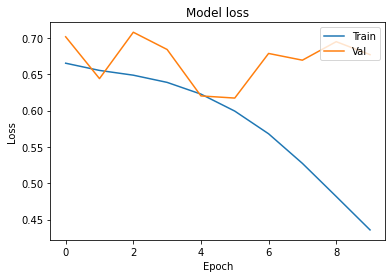

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

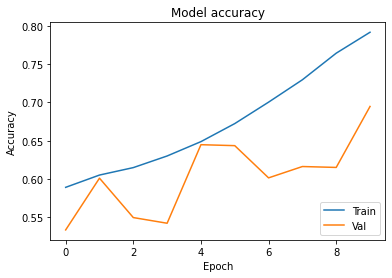

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
len(Y_test)
print(np.array(Y_test))

[1 0 0 ... 0 1 0]


In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([[0.9104946 ],
       [0.00263059],
       [0.00961891],
       ...,
       [0.02715907],
       [0.7376193 ],
       [0.01529825]], dtype=float32)

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred>0.5)

In [ ]:
predictions = pd.DataFrame(Y_pred)
predictions[0].value_counts()

False    10977
True      4288
Name: 0, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
print("Acc",accuracy_score(Y_test, Y_pred))
print("Recall",recall_score(Y_test, Y_pred))
print("F1",f1_score(Y_test, Y_pred))
print("Precision",precision_score(Y_test, Y_pred))

Acc 0.7010809040288241
Recall 0.4174174174174174
F1 0.23349571644548964
Precision 0.162080223880597


In [ ]:

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81     13600
           1       0.16      0.42      0.23      1665

    accuracy                           0.70     15265
   macro avg       0.54      0.58      0.52     15265
weighted avg       0.83      0.70      0.75     15265



###DTREE

In [ ]:
dtree=DecisionTreeClassifier(max_depth=7)
dtree.fit(X_train,Y_train)
y_pred_dt=dtree.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75     13600
           1       0.17      0.62      0.27      1665

    accuracy                           0.63     15265
   macro avg       0.55      0.62      0.51     15265
weighted avg       0.85      0.63      0.70     15265



###ADABOOST

In [ ]:
ada_model=AdaBoostClassifier(n_estimators=150)
ada_model.fit(X_train,Y_train)
y_pred_am=ada_model.predict(X_test)
print(classification_report(Y_test, y_pred_am))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78     13600
           1       0.18      0.59      0.28      1665

    accuracy                           0.67     15265
   macro avg       0.56      0.63      0.53     15265
weighted avg       0.85      0.67      0.73     15265



###BAGGING

In [ ]:
bagg_model=BaggingClassifier(n_estimators=150)

bagg_model.fit(X_train,Y_train)
y_pred_bm=bagg_model.predict(X_test)
print(classification_report(Y_test, y_pred_bm))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13600
           1       0.40      0.08      0.13      1665

    accuracy                           0.89     15265
   macro avg       0.65      0.53      0.53     15265
weighted avg       0.84      0.89      0.85     15265



###RANDOMFOREST

In [ ]:
rfc=RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,Y_train)
y_pred_rm=rfc.predict(X_test)
print(classification_report(Y_test, y_pred_rm))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     13600
           1       0.22      0.10      0.14      1665

    accuracy                           0.86     15265
   macro avg       0.56      0.53      0.53     15265
weighted avg       0.82      0.86      0.84     15265

